In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model


wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz -P data/.
tar -xvzf data/101_ObjectCategories.tar.gz -C data/.

In [4]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def get_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

predicted Saluki with probability 0.887
predicted Afghan_hound with probability 0.060
predicted borzoi with probability 0.013
predicted whippet with probability 0.011
predicted Irish_wolfhound with probability 0.007


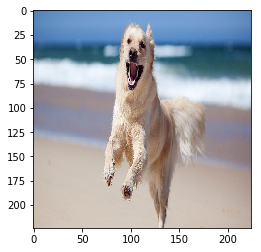

In [12]:

img, x = get_image("data/dog.jpg")
predictions = model.predict(x)
plt.imshow(img)
for pred in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred[1], pred[2]))

In [13]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

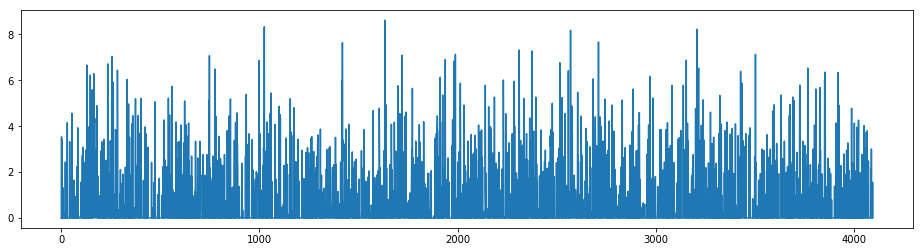

In [16]:
img, x = get_image("data/dog.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])


In [19]:
images_path = 'data/101_ObjectCategories'
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 9144 images to analyze


In [ ]:
features = []
for i, image_path in enumerate(images):
    if i % 100 == 0:
        print("analyzing image %d / %d" % (i, len(images)))
    img, x = get_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)


analyzing image 0 / 9144
analyzing image 100 / 9144
analyzing image 200 / 9144
analyzing image 300 / 9144
analyzing image 400 / 9144
analyzing image 500 / 9144
analyzing image 600 / 9144
analyzing image 700 / 9144
analyzing image 800 / 9144
analyzing image 900 / 9144
analyzing image 1000 / 9144
analyzing image 1100 / 9144
analyzing image 1200 / 9144
analyzing image 1300 / 9144
analyzing image 1400 / 9144
analyzing image 1500 / 9144
analyzing image 1600 / 9144
analyzing image 1700 / 9144
analyzing image 1800 / 9144
analyzing image 1900 / 9144
analyzing image 2000 / 9144
analyzing image 2100 / 9144
analyzing image 2200 / 9144
analyzing image 2300 / 9144
analyzing image 2400 / 9144
analyzing image 2500 / 9144
analyzing image 2600 / 9144
analyzing image 2700 / 9144
analyzing image 2800 / 9144
analyzing image 2900 / 9144
analyzing image 3000 / 9144
analyzing image 3100 / 9144
analyzing image 3200 / 9144
analyzing image 3300 / 9144
analyzing image 3400 / 9144
analyzing image 3500 / 9144
anal

In [ ]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [ ]:
import random

query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)



In [ ]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.euclidean(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
imshow(query_image)
matplotlib.pyplot.title("query image (%d)" % query_image_idx)

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
imshow(results_image)
matplotlib.pyplot.title("result images")

In [ ]:

import pickle

pickle.dump([images, pca_features], open('data/features_caltech101.p', 'wb'))